In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

# Regression example

## Step 1. Preparation of data

create an evenly spaced numbers to form a linear regression

In [8]:
x_data = np.linspace(0.0,10.0,1000000)

create noises to blur the line

In [11]:
noise = np.random.randn(len(x_data))

y = mx + b

b = 5

In [12]:
y_true = (0.5 * x_data) + 5 + noise

In [13]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [19]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [32]:
my_data = pd.concat([x_df,y_df],axis=1)

In [34]:
my_data.head()

,X Data,Y
0,0.00000,4.735408
1,0.00001,5.455758
2,0.00002,6.019079
3,0.00003,4.880396
4,0.00004,6.526950


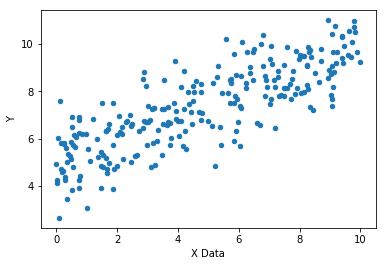

In [40]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

## Step 2. Begin of tensorflow learning

In [42]:
batch_size = 8

In [43]:
np.random.randn(2)

array([-1.11742624, -0.88452287])

In [41]:
m = tf.Variable(-1.117)

In [44]:
b = tf.Variable(-0.88)

In [45]:
xph = tf.placeholder(tf.float32,[batch_size])

In [48]:
yph = tf.placeholder(tf.float32,[batch_size])

prediction

In [47]:
y_model = m*xph+b

cost function

In [49]:
error = tf.reduce_sum(tf.square(yph-y_model))

optimizer

In [52]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [53]:
train = optimizer.minimize(error)

initialize variables

In [54]:
init = tf.global_variables_initializer()

run session

In [64]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        # random index - extract from 0-1000000 not include 1000000th
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
    
    # predicted model
    model_m,model_b = sess.run([m,b])

In [65]:
y_hat = x_data * model_m + model_b

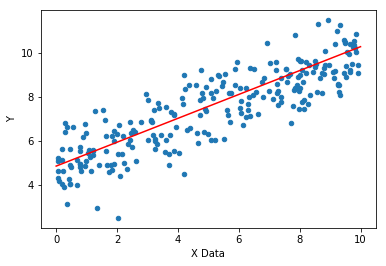

In [68]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

In [69]:
model_m

0.54227197

In [71]:
model_b

4.8461151

## Alternative for Step 2. tf.estimator API

In [72]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [75]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_model_dir': 'C:\\Users\\LUCASK~1\\AppData\\Local\\Temp\\tmphb98zs58', '_session_config': None, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5}


In [76]:
from sklearn.model_selection import train_test_split

In [81]:
x_train,x_eval,y_train,y_eval = train_test_split(x_data,y_true,test_size=0.3,random_state=101)

In [82]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

In [83]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=1000,shuffle=False)

In [84]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=8,num_epochs=1000,shuffle=False)

In [85]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\LUCASK~1\AppData\Local\Temp\tmphb98zs58\model.ckpt.
INFO:tensorflow:loss = 446.209, step = 1
INFO:tensorflow:global_step/sec: 647.623
INFO:tensorflow:loss = 41.8189, step = 101 (0.155 sec)
INFO:tensorflow:global_step/sec: 958.985
INFO:tensorflow:loss = 25.7165, step = 201 (0.104 sec)
INFO:tensorflow:global_step/sec: 1254.51
INFO:tensorflow:loss = 14.8559, step = 301 (0.080 sec)
INFO:tensorflow:global_step/sec: 1270.5
INFO:tensorflow:loss = 16.8765, step = 401 (0.079 sec)
INFO:tensorflow:global_step/sec: 1303.7
INFO:tensorflow:loss = 16.8799, step = 501 (0.077 sec)
INFO:tensorflow:global_step/sec: 1146.37
INFO:tensorflow:loss = 5.02338, step = 601 (0.089 sec)
INFO:tensorflow:global_step/sec: 1084.07
INFO:tensorflow:loss = 6.80983, step = 701 (0.091 sec)
INFO:tensorflow:global_step/sec: 1295.25
INFO:tensorflow:loss = 13.8617, step = 801 (0.077 sec)
INFO:tensorflow:global_step/sec: 1133.34
I

In [86]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2017-11-21-01:55:49
INFO:tensorflow:Restoring parameters from C:\Users\LUCASK~1\AppData\Local\Temp\tmphb98zs58\model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [2

INFO:tensorflow:Evaluation [215/1000]
INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [431/1000]
INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [647/1000]
INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [863/1000]
INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorf

In [87]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2017-11-21-01:57:42
INFO:tensorflow:Restoring parameters from C:\Users\LUCASK~1\AppData\Local\Temp\tmphb98zs58\model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [2

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorflow:Evaluation [457/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorflow:Evaluation [673/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorflow:Evaluation [889/1000]
INFO:tensorf

In [89]:
print("TRAIN METRICS")
print(train_metrics)

TRAIN METRICS
{'global_step': 1000, 'average_loss': 1.0648317, 'loss': 8.5186539}


In [92]:
print("EVAL METRICS")
print(eval_metrics)

EVAL METRICS
{'global_step': 1000, 'average_loss': 1.1132389, 'loss': 8.9059114}


In [93]:
brand_new_data = np.linspace(0,10,10)

In [94]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [96]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Restoring parameters from C:\Users\LUCASK~1\AppData\Local\Temp\tmphb98zs58\model.ckpt-1000


[{'predictions': array([ 4.45784903], dtype=float32)},
 {'predictions': array([ 5.12064123], dtype=float32)},
 {'predictions': array([ 5.78343344], dtype=float32)},
 {'predictions': array([ 6.44622564], dtype=float32)},
 {'predictions': array([ 7.10901833], dtype=float32)},
 {'predictions': array([ 7.77181053], dtype=float32)},
 {'predictions': array([ 8.43460274], dtype=float32)},
 {'predictions': array([ 9.09739494], dtype=float32)},
 {'predictions': array([ 9.76018715], dtype=float32)},
 {'predictions': array([ 10.42297935], dtype=float32)}]

In [97]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Restoring parameters from C:\Users\LUCASK~1\AppData\Local\Temp\tmphb98zs58\model.ckpt-1000


In [98]:
predictions

[array([ 4.45784903], dtype=float32),
 array([ 5.12064123], dtype=float32),
 array([ 5.78343344], dtype=float32),
 array([ 6.44622564], dtype=float32),
 array([ 7.10901833], dtype=float32),
 array([ 7.77181053], dtype=float32),
 array([ 8.43460274], dtype=float32),
 array([ 9.09739494], dtype=float32),
 array([ 9.76018715], dtype=float32),
 array([ 10.42297935], dtype=float32)]

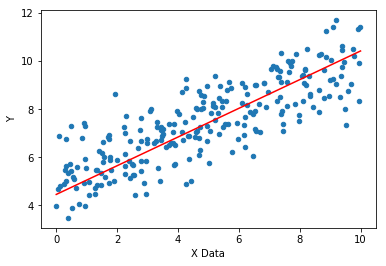

In [100]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(brand_new_data,predictions,'r')